# Regression

Linear regression is the most fundamental machine learning algorithm. We will demonstrate linear regression in Python using the classic Boston house price dataset. The goal is to predict median housing prices for each census tract in the Boston metropolitan area. See https://www.kaggle.com/c/boston-housing for more information about this dataset.

First, let's import some modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(42)

We load the data into a Pandas dataframe.

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We create a pair plot to show the relationship between some of the variables. The dummy variable CHAS indicates tracts that border the Charles River.

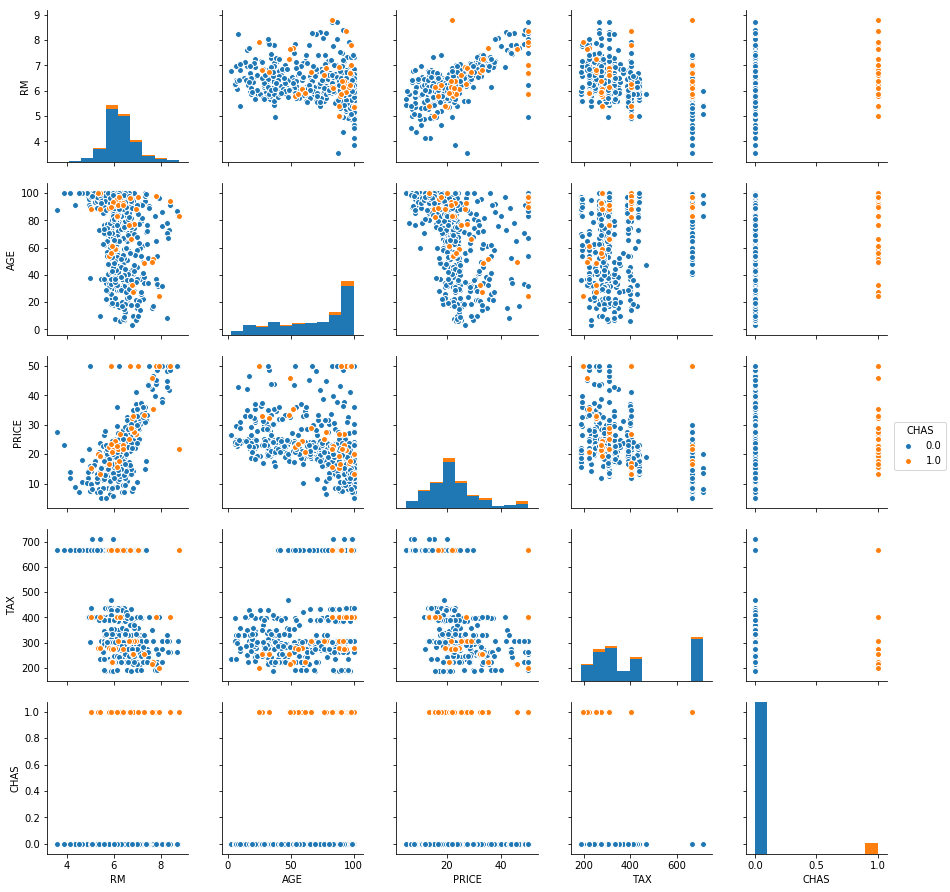

In [3]:
sns.pairplot(df[['RM', 'AGE', 'PRICE', 'TAX', 'CHAS']], hue='CHAS')

We split the data into a training set and a test set.

In [4]:
X = df.drop(['PRICE'], axis=1).values
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Create a regression model, and fit the training data to the model.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Use the trained model to predict the target values for the test set. 

In [6]:
y_pred = model.predict(X_test)

Create a plot to compare the predicted values (y-axis

Text(0,0.5,'Predicted')

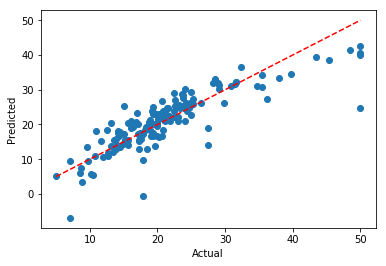

In [7]:
plt.plot(y_test, y_pred, 'o')
rng = y.min(), y.max()
plt.plot(rng, rng, 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Evaluate the model accuracy. Can you improve the model? 

In [8]:
print("R^2 = %.3f" % model.score(X_test, y_test))

R^2 = 0.711
